# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
2. Scroll down to API and click Create New API Token.
3. Open up `kaggle.json` and use the username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached bokeh-2.0.1.tar.gz (8.6 MB)
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 142.9 MB/s eta 0:00:00
  DEPRECATION: Building 'bokeh' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'bokeh'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080109 sha256=d720324d565ba04d7d273295973ca936ab489f6e3a7eab94edb8daf1ee0354a8
  Stored in directory: /root/.cache/pip/wheels/0e/c4/ce/fecee9e6406e166eab

### Setup Kaggle API Key

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions list


ref                                                                                deadline             category                reward  teamCount  userHasEntered  
---------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/arc-prize-2025                                 2025-11-03 23:59:00  Featured         1,000,000 Usd        474           False  
https://www.kaggle.com/competitions/openai-to-z-challenge                          2025-06-29 23:59:00  Featured           400,000 Usd          0           False  
https://www.kaggle.com/competitions/waveform-inversion                             2025-06-30 23:59:00  Research            50,000 Usd       1027           False  
https://www.kaggle.com/competitions/cmi-detect-behavior-with-sensor-data           2025-09-02 23:59:00  Featured            50,000 Usd        621           False  
https://www.kagg

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms

In [9]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 467MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [10]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [11]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
train.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
season,10886.0,2.506614,1.0,2.0,3.0,4.0,4.0,1.116174
holiday,10886.0,0.028569,0.0,0.0,0.0,0.0,1.0,0.166599
workingday,10886.0,0.680875,0.0,0.0,1.0,1.0,1.0,0.466159
weather,10886.0,1.418427,1.0,1.0,1.0,2.0,4.0,0.633839
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477


In [13]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [14]:
test.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
datetime,6493,2012-01-13 09:27:47.765285632,2011-01-20 00:00:00,2011-07-22 15:00:00,2012-01-20 23:00:00,2012-07-20 17:00:00,2012-12-31 23:00:00,NaN
season,6493.0,2.4933,1.0,2.0,3.0,3.0,4.0,1.091258
holiday,6493.0,0.029108,0.0,0.0,0.0,0.0,1.0,0.168123
workingday,6493.0,0.685815,0.0,0.0,1.0,1.0,1.0,0.464226
weather,6493.0,1.436778,1.0,1.0,1.0,2.0,4.0,0.64839
temp,6493.0,20.620607,0.82,13.94,21.32,27.06,40.18,8.059583
atemp,6493.0,24.012865,0.0,16.665,25.0,31.06,50.0,8.782741
humidity,6493.0,64.125212,16.0,49.0,65.0,81.0,100.0,19.293391
windspeed,6493.0,12.631157,0.0,7.0015,11.0014,16.9979,55.9986,8.250151


In [15]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [16]:
train_data = train
train_data = train_data.drop(columns=["casual", "registered"])

In [17]:
predictor = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error"
).fit(
    train_data,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250607_234635"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.39 GB / 12.67 GB (89.9%)
Disk Space Avail:   66.55 GB / 107.72 GB (61.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=3245) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=3433) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=3495) [1000]	valid_set's rmse: 128.154
(_ray_fit pid=3495) [2000]	valid_set's rmse: 126.702
(_ray_fit pid=3495) [3000]	valid_set's rmse: 126.147
(_ray_fit pid=3495) [4000]	valid_set's rmse: 125.904
(_ray_fit pid=3553) [2000]	valid_set's rmse: 134.443 [repeated 3x across cluster]
(_ray_fit pid=3553) [5000]	valid_set's rmse: 132.706 [repeated 6x across cluster]


(_ray_fit pid=3495) 	Ran out of time, early stopping on iteration 8431. Best iteration is:
(_ray_fit pid=3495) 	[7106]	valid_set's rmse: 125.339


(_ray_fit pid=3553) [8000]	valid_set's rmse: 132.379 [repeated 3x across cluster]
(_ray_fit pid=3694) [1000]	valid_set's rmse: 137.712 [repeated 2x across cluster]
(_ray_fit pid=3694) [4000]	valid_set's rmse: 135.344 [repeated 3x across cluster]
(_ray_fit pid=3694) [7000]	valid_set's rmse: 135.236 [repeated 5x across cluster]


(_dystack pid=3055) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3055) 	87.07s	 = Training   runtime
(_dystack pid=3055) 	13.79s	 = Validation runtime
(_dystack pid=3055) Fitting model: WeightedEnsemble_L2 ... Training model for up to 142.76s of the 42.98s of remaining time.
(_dystack pid=3055) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=3055) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3055) 	0.02s	 = Training   runtime
(_dystack pid=3055) 	0.0s	 = Validation runtime
(_dystack pid=3055) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=3055) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 42.95s of the 42.75s of remaining time.
(_dystack pid=3055) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)


(_ray_fit pid=3892) [1000]	valid_set's rmse: 70.3611 [repeated 5x across cluster]
(_ray_fit pid=4005) [1000]	valid_set's rmse: 77.4878 [repeated 2x across cluster]
(_ray_fit pid=4123) [1000]	valid_set's rmse: 76.4032 [repeated 2x across cluster]
(_ray_fit pid=4242) [1000]	valid_set's rmse: 73.4134 [repeated 2x across cluster]


(_dystack pid=3055) 	-74.3067	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3055) 	48.09s	 = Training   runtime
(_dystack pid=3055) 	2.43s	 = Validation runtime
(_dystack pid=3055) Fitting model: WeightedEnsemble_L3 ... Training model for up to 142.76s of the -11.08s of remaining time.
(_dystack pid=3055) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.947, 'KNeighborsDist_BAG_L1': 0.053}
(_dystack pid=3055) 	-74.2555	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3055) 	0.01s	 = Training   runtime
(_dystack pid=3055) 	0.0s	 = Validation runtime
(_dystack pid=3055) AutoGluon training complete, total runtime = 154.28s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 74.5 rows/s (1210 batch size)
(_dystack pid=3055) TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250607_234635/ds_sub_fit/sub_fit_ho")
(_dystack pid=3055) Deleting DyStack predictor artifacts (clean_up_fits=True) ...
Lead

### Review AutoGluon's training run with ranking of models that did the best.

In [19]:
predictor.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-55.054901,root_mean_squared_error,26.181087,373.466759,0.000809,0.027246,3,True,11
1,LightGBM_BAG_L2,-55.145568,root_mean_squared_error,20.221712,300.624579,0.286987,41.397880,2,True,10
2,LightGBMXT_BAG_L2,-60.403446,root_mean_squared_error,25.893291,332.041634,5.958566,72.814934,2,True,9
3,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.059151,0.060290,0.059151,0.060290,1,True,2
4,WeightedEnsemble_L2,-84.125061,root_mean_squared_error,0.061119,0.084806,0.001968,0.024516,2,True,8
5,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.056741,0.055604,0.056741,0.055604,1,True,1
6,RandomForestMSE_BAG_L1,-116.548359,root_mean_squared_error,0.643512,18.921649,0.643512,18.921649,1,True,5
7,ExtraTreesMSE_BAG_L1,-124.600676,root_mean_squared_error,0.630389,9.703326,0.630389,9.703326,1,True,7
8,CatBoost_BAG_L1,-131.015139,root_mean_squared_error,0.146454,103.782309,0.146454,103.782309,1,True,6
9,LightGBM_BAG_L1,-131.054162,root_mean_squared_error,1.796739,42.864861,1.796739,42.864861,1,True,4


In [27]:
#predictor.fit_summary()

### Create predictions from test dataset

In [34]:
predictions = predictor.predict(test)
predictions.head()

,count
0,36.886292
1,45.200489
2,48.684017
3,51.885418
4,52.739521


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [35]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,100.195526
std,90.280220
min,-2.597213
25%,16.447807
50%,62.667683
75%,173.290558
max,368.331085


In [38]:
# How many negative values do we have?
print((predictions < 0).sum())

5


In [40]:
# Set them to zero
predictions[predictions < 0] = 0

In [66]:
print((predictions < 0).sum())

0


### Set predictions to submission dataframe, save, and submit

In [43]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [44]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 338kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [45]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                        description           status                     publicScore  privateScore  
--------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission.csv  2025-06-08 02:00:06.850000  first raw submission  SubmissionStatus.COMPLETE  1.83939      1.83939       


#### Initial score of `1.83939`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

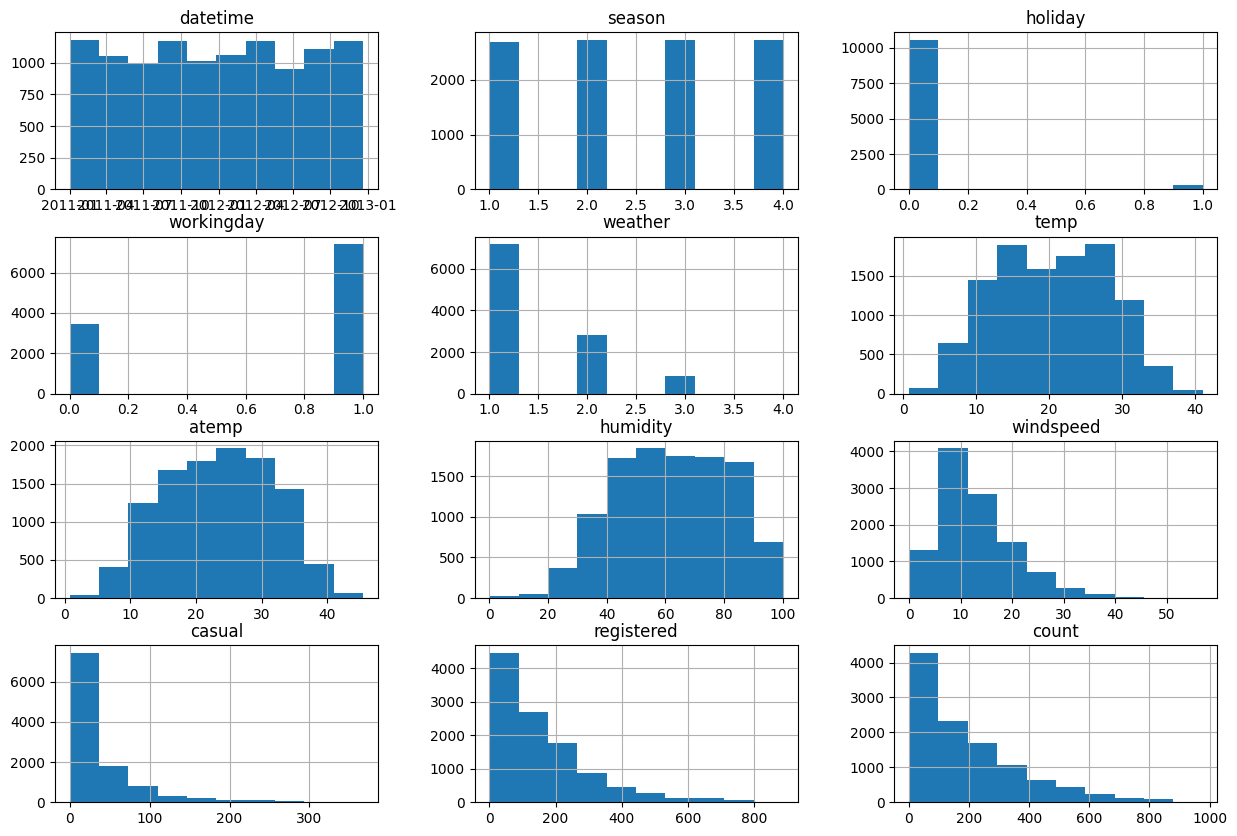

In [46]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15, 10))

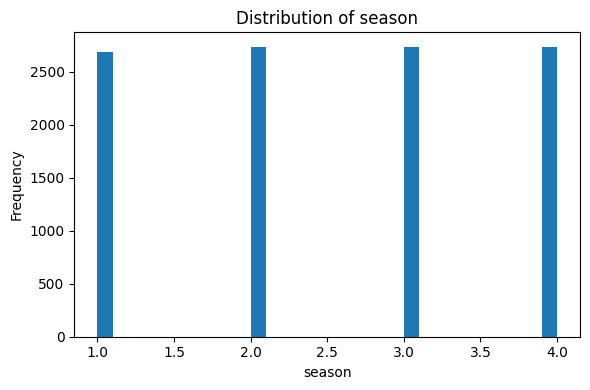

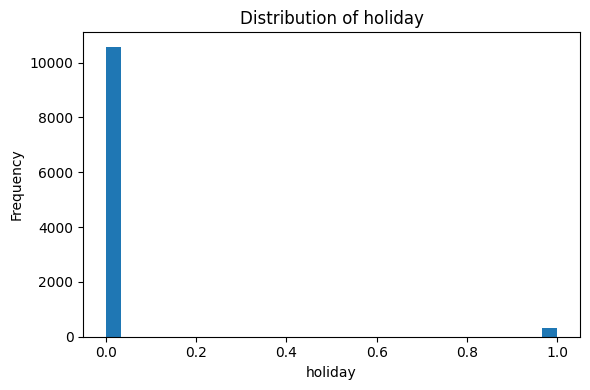

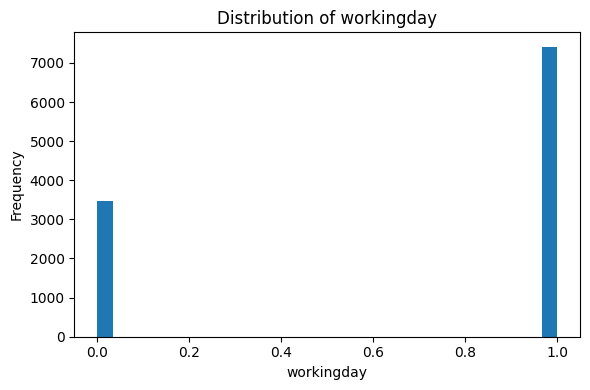

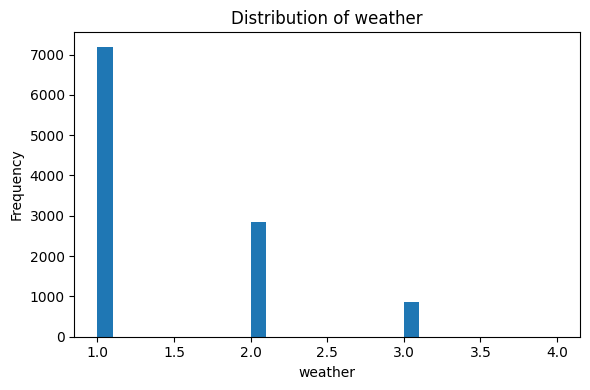

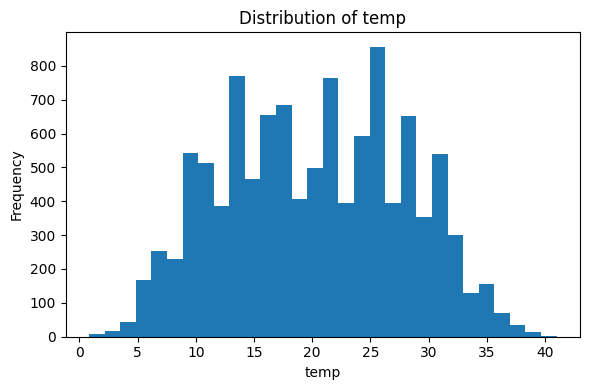

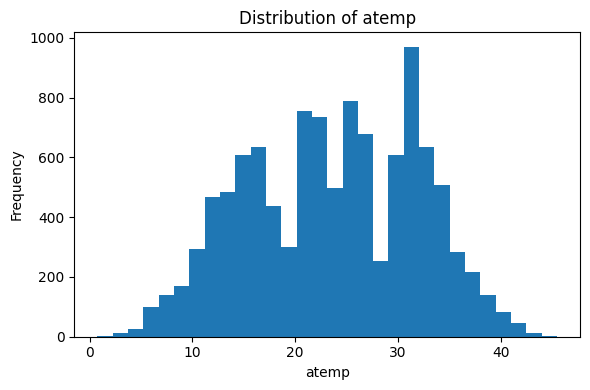

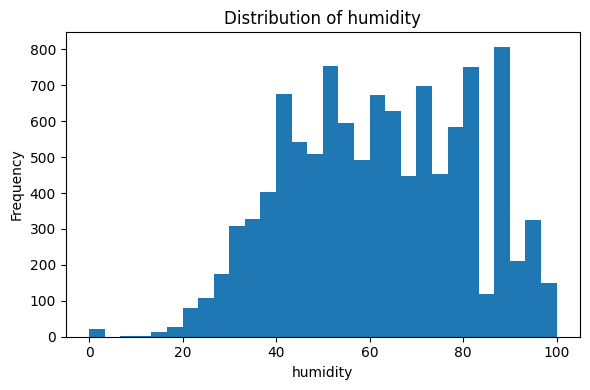

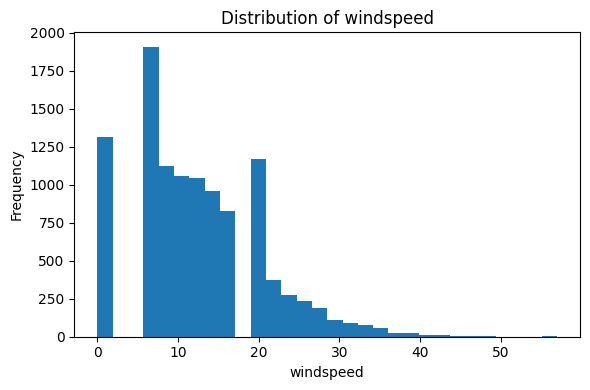

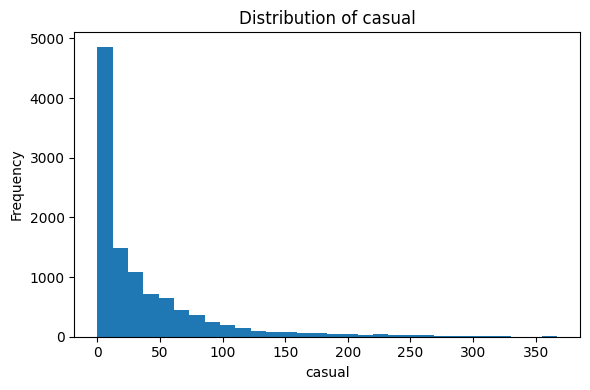

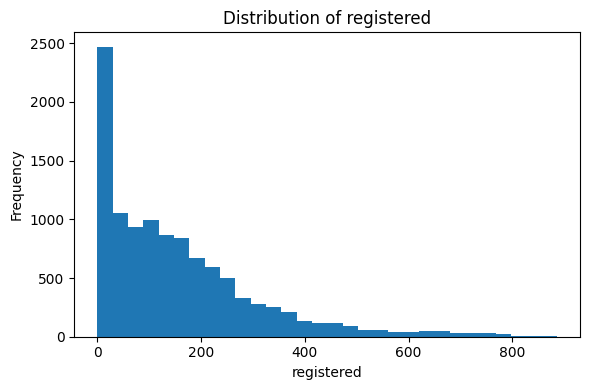

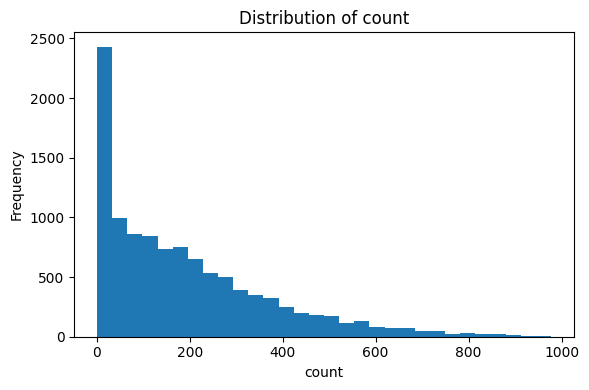

In [48]:
import matplotlib.pyplot as plt

numeric_columns = train.select_dtypes(include=["float64", "int64"]).columns

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    train[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.tight_layout()
    plt.show()


In [49]:
# create a new feature
train["hour"] = train["datetime"].dt.hour
test["hour"] = test["datetime"].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [50]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [54]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >]], dtype=object)

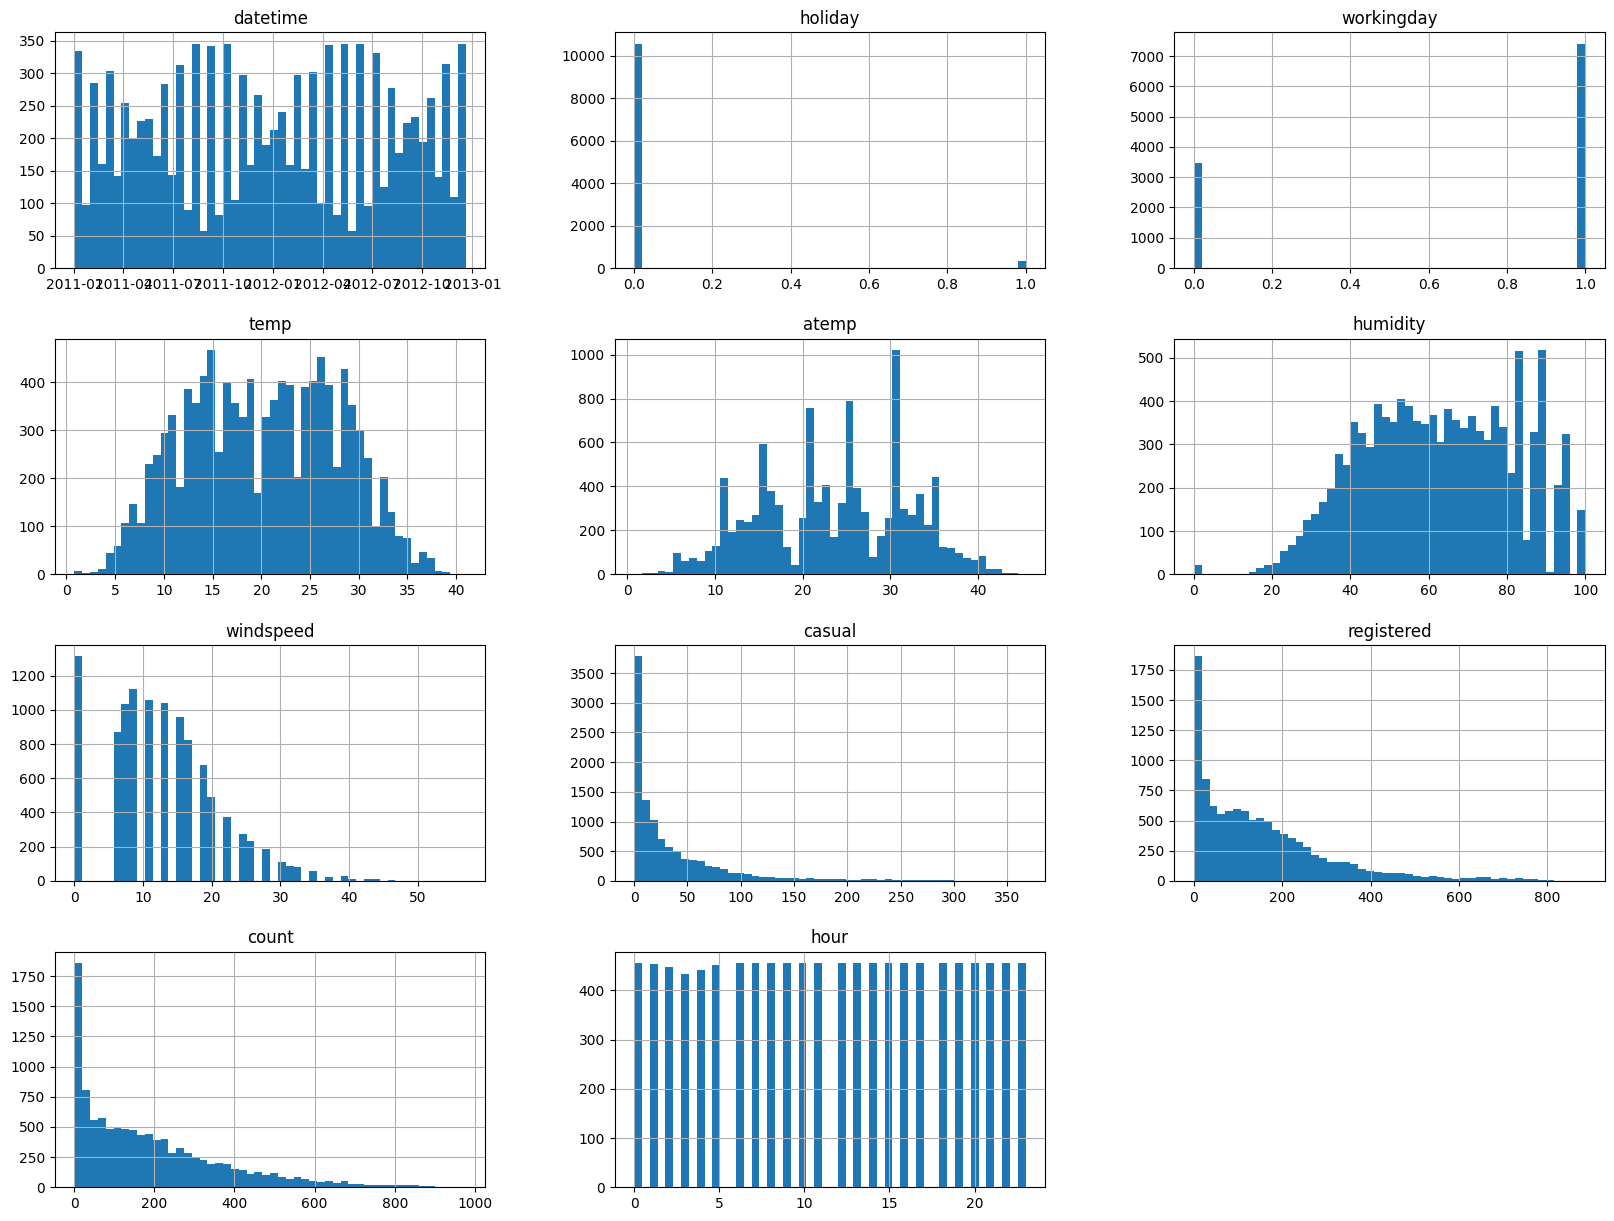

In [58]:
# View histogram of all features again now with the hour feature
train.hist(bins=50, figsize=(20,15))

## Step 5: Rerun the model with the same settings as before, just with more features

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [62]:
train = train.drop(columns=["casual", "registered"])

predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train, time_limit=600, presets="best_quality")


No path specified. Models will be saved in: "AutogluonModels/ag-20250608_031305"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.54 GB / 12.67 GB (75.3%)
Disk Space Avail:   65.78 GB / 107.72 GB (61.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

In [68]:
#predictor_new_features.fit_summary()
predictor_new_features.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-30.428847,root_mean_squared_error,53.232300,371.341935,0.000843,0.027917,3,True,10
1,LightGBM_BAG_L2,-30.667943,root_mean_squared_error,50.375718,269.847229,0.634663,45.632734,2,True,8
2,LightGBMXT_BAG_L2,-31.218084,root_mean_squared_error,51.756523,280.771901,2.015468,56.557406,2,True,7
3,RandomForestMSE_BAG_L2,-31.997543,root_mean_squared_error,50.581326,269.123878,0.840271,44.909383,2,True,9
4,WeightedEnsemble_L2,-32.370366,root_mean_squared_error,49.682774,224.191972,0.001056,0.026805,2,True,6
5,LightGBM_BAG_L1,-33.919639,root_mean_squared_error,5.804370,65.868017,5.804370,65.868017,1,True,4
6,LightGBMXT_BAG_L1,-34.457274,root_mean_squared_error,42.992999,134.239668,42.992999,134.239668,1,True,3
7,RandomForestMSE_BAG_L1,-38.454338,root_mean_squared_error,0.815811,24.007711,0.815811,24.007711,1,True,5
8,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.068537,0.049772,0.068537,0.049772,1,True,2
9,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.059337,0.049328,0.059337,0.049328,1,True,1


In [72]:
predictions_new = predictor_new_features.predict(test)

In [73]:
# Remember to set all negative values to zero
print((predictions_new < 0).sum())
predictions_new[predictions_new < 0] = 0

0


In [76]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv")
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [77]:
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,16.903080
1,2011-01-20 01:00:00,11.508935
2,2011-01-20 02:00:00,10.523116
3,2011-01-20 03:00:00,8.841933
4,2011-01-20 04:00:00,7.671376


In [78]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 326kB/s]
Successfully submitted to Bike Sharing Demand

In [79]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-06-08 04:15:54.810000  new features          SubmissionStatus.COMPLETE  0.62523      0.62523       
submission.csv               2025-06-08 02:00:06.850000  first raw submission  SubmissionStatus.COMPLETE  1.83939      1.83939       


#### New Score of `0.62523`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [100]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])
test = pd.read_csv("test.csv", parse_dates=["datetime"])
submission_new_hpo = pd.read_csv("sampleSubmission.csv")

In [81]:
train["hour"] = train["datetime"].dt.hour
test["hour"] = test["datetime"].dt.hour
for col in ["season", "weather"]:
    train[col] = train[col].astype("category")
    test[col] = test[col].astype("category")

In [82]:
train = train.drop(columns=["casual", "registered"])

In [88]:
hyperparameters = {
    "GBM": {
        "num_boost_round": 350,
        "learning_rate": 0.04,
        "extra_trees": True,
        "ag_args": {"name_suffix": "_tuned_gbm"}
    },
    "RF": {
        "n_estimators": 180,
        "max_depth": 20,
        "ag_args": {"name_suffix": "_tuned_rf"}
    },
    "XT": {
        "n_estimators": 220,
        "max_depth": 18,
        "ag_args": {"name_suffix": "_tuned_xt"}
    },
    "NN_TORCH": {
        "num_epochs": 25,
        "learning_rate": 0.003,
        "ag_args": {"name_suffix": "_tuned_nn"}
    }
}

In [89]:
predictor_new_hpo = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error"
).fit(
    train,
    time_limit=600,
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs="auto"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250608_054338"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.03 GB / 12.67 GB (71.2%)
Disk Space Avail:   64.08 GB / 107.72 GB (59.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

+-------------------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_tuned_nn_BAG_L1   |
+-------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                  |
| Scheduler                        FIFOScheduler                    |
| Number of trials                 1000                             |
+-------------------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250608_054338/models/NeuralNetTorch_tuned_nn_BAG_L1


2025-06-08 05:49:32,882	INFO timeout.py:54 -- Reached timeout of 56.467547983664275 seconds. Stopping all trials.
2025-06-08 05:49:32,908	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250608_054338/models/NeuralNetTorch_tuned_nn_BAG_L1' in 0.0158s.
2025-06-08 05:49:42,955	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 2 trial(s):
- 06ddb859: FileNotFoundError('Could not fetch metrics for 06ddb859: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250608_054338/models/NeuralNetTorch_tuned_nn_BAG_L1/06ddb859')
- a4133361: FileNotFoundError('Could not fetch metrics for a4133361: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250608_054338/models/NeuralNetTorch_tuned_nn_BAG_L1/a4133361')
No model was trained during hyperparameter tuning NeuralNetTorch_tuned_nn_BAG_L1... Skipping this model.
Fitting model: WeightedEnsemble_L2 ... Tr

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.11%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_tuned_gbm_BAG_L2/T1 ...
	-35.8989	 = Validation score   (-root_mean_squared_error)
	49.62s	 = Training   runtime
	0.7s	 = Validation runtime
Hyperparameter tuning model: RandomForest_tuned_rf_BAG_L2 ... Tuning model for up to 52.9s of the 185.25s of remaining time.
	No hyperparameter search space specified for RandomForest_tuned_rf_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
Fitted model: RandomForest_tuned_rf_BAG_L2 ...
	-37.0317	 = Validation score   (-root_

+-------------------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_tuned_nn_BAG_L2   |
+-------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                  |
| Scheduler                        FIFOScheduler                    |
| Number of trials                 1000                             |
+-------------------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250608_054338/models/NeuralNetTorch_tuned_nn_BAG_L2


2025-06-08 05:51:59,786	INFO timeout.py:54 -- Reached timeout of 52.89576458930969 seconds. Stopping all trials.
2025-06-08 05:51:59,819	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250608_054338/models/NeuralNetTorch_tuned_nn_BAG_L2' in 0.0213s.
2025-06-08 05:52:09,852	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 2 trial(s):
- bf5e26fb: FileNotFoundError('Could not fetch metrics for bf5e26fb: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250608_054338/models/NeuralNetTorch_tuned_nn_BAG_L2/bf5e26fb')
- 73042ca6: FileNotFoundError('Could not fetch metrics for 73042ca6: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250608_054338/models/NeuralNetTorch_tuned_nn_BAG_L2/73042ca6')
No model was trained during hyperparameter tuning NeuralNetTorch_tuned_nn_BAG_L2... Skipping this model.
Fitting model: WeightedEnsemble_L3 ... Tra

In [91]:
#predictor_new_hpo.fit_summary()
predictor_new_hpo.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-35.618643,root_mean_squared_error,3.755672,157.155552,0.001201,0.050944,3,True,8
1,LightGBM_tuned_gbm_BAG_L2/T1,-35.898932,root_mean_squared_error,2.736861,123.597029,0.699176,49.623390,2,True,5
2,ExtraTrees_tuned_xt_BAG_L2,-36.733856,root_mean_squared_error,2.583231,84.218515,0.545547,10.244876,2,True,7
3,RandomForest_tuned_rf_BAG_L2,-37.031747,root_mean_squared_error,2.509747,97.236341,0.472063,23.262703,2,True,6
4,WeightedEnsemble_L2,-37.244047,root_mean_squared_error,2.038910,74.032999,0.001226,0.059360,2,True,4
5,ExtraTrees_tuned_xt_BAG_L1,-38.566400,root_mean_squared_error,0.552811,9.868860,0.552811,9.868860,1,True,3
6,RandomForest_tuned_rf_BAG_L1,-38.593093,root_mean_squared_error,0.731563,16.099134,0.731563,16.099134,1,True,2
7,LightGBM_tuned_gbm_BAG_L1/T1,-49.219189,root_mean_squared_error,0.753310,48.005644,0.753310,48.005644,1,True,1


In [94]:
predictor_new_hpo = predictor_new_hpo.predict(test)

In [97]:
# Remember to set all negative values to zero
predictor_new_hpo[predictor_new_hpo < 0] = 0
print((predictor_new_hpo < 0).sum())

0


In [101]:
# Same submitting predictions
submission_new_hpo["count"] = predictor_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [102]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 327kB/s]
Successfully submitted to Bike Sharing Demand

In [103]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-06-08 06:01:22.907000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.45275      0.45275       
submission_new_features.csv  2025-06-08 04:15:54.810000  new features                       SubmissionStatus.COMPLETE  0.62523      0.62523       
submission.csv               2025-06-08 02:00:06.850000  first raw submission               SubmissionStatus.COMPLETE  1.83939      1.83939       


#### New Score of `0.45275`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

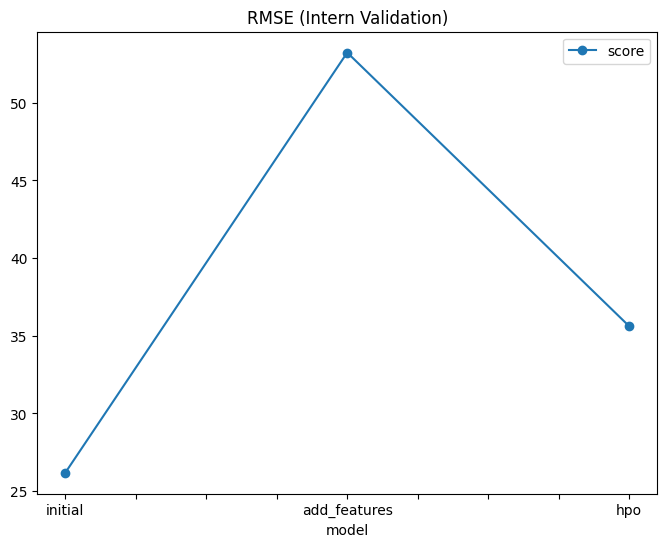

In [107]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [26.181, 53.232, 35.618]
    }
).plot(x="model", y="score", figsize=(8, 6), marker='o', title="RMSE (Intern Validation)").get_figure()
fig.savefig('model_train_score.png')

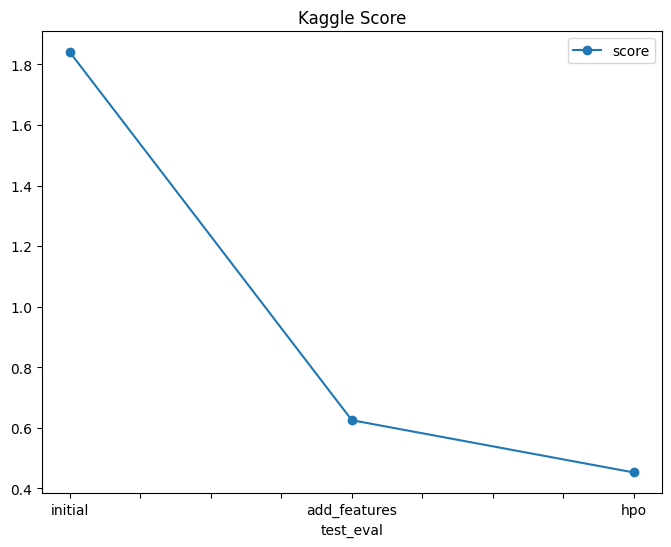

In [108]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.83939, 0.62523, 0.45275]
    }
).plot(x="test_eval", y="score", figsize=(8, 6), marker='o', title="Kaggle Score").get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [110]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["-", "-", "GBM: num_boost_round=350"],
    "hpo2": ["-", "-", "RF: n_estimators=180"],
    "hpo3": ["-", "-", "XT: n_estimators=220"],
    "score": [1.83939, 0.62523, 0.45275]
}).transpose()


,0,1,2
model,initial,add_features,hpo
hpo1,-,-,GBM: num_boost_round=350
hpo2,-,-,RF: n_estimators=180
hpo3,-,-,XT: n_estimators=220
score,1.83939,0.62523,0.45275



# 🚴‍♀️ Bike Sharing Demand - Final Report (AutoGluon)

## 📁 Dataset Loading

I downloaded the Bike Sharing Demand dataset from Kaggle using the Kaggle CLI and API token, and loaded the three required files into pandas:

- `train.csv`
- `test.csv`
- `sampleSubmission.csv`

These were imported using `pd.read_csv()` and previewed in the notebook.

---

## 🔍 Feature Engineering & Data Analysis

### 1. Feature Created

I extracted the **hour** from the `datetime` column and added it as a new feature in both `train` and `test` datasets.

### 2. Histograms

Histograms of all features in the training set were plotted using `matplotlib`, allowing me to identify distribution skew, potential outliers, and class imbalance.

### 3. Datatype Conversion

I converted selected numerical columns to categorical types to better inform the model. Features like:
- `season`
- `weather`
- `hour`

were set to `category` datatype using `astype("category")`.

---

## 🤖 Model Training with AutoGluon

I trained models using the `TabularPredictor` class from AutoGluon across **three major iterations**:

### 1. Initial Training

- Used the `best_quality` preset.
- No extra features or hyperparameter tuning.

### 2. With New Feature (hour)

- Introduced the `hour` feature.
- Helped model learn time-based patterns in usage behavior.

### 3. Hyperparameter Optimization (HPO)

I modified training using the following hyperparameters:

```python
hyperparameters = {
    "GBM": {
        "num_boost_round": 350,
        "learning_rate": 0.04,
        "extra_trees": True,
        "ag_args": {"name_suffix": "_tuned_gbm"}
    },
    "RF": {
        "n_estimators": 180,
        "max_depth": 20,
        "ag_args": {"name_suffix": "_tuned_rf"}
    },
    "XT": {
        "n_estimators": 220,
        "max_depth": 18,
        "ag_args": {"name_suffix": "_tuned_xt"}
    },
    "NN_TORCH": {
        "num_epochs": 25,
        "learning_rate": 0.003,
        "ag_args": {"name_suffix": "_tuned_nn"}
    }
}
```

---

## 📊 Model Evaluation and Results

### Internal Validation Scores (RMSE ↓ better)

| Run           | Top Model              | RMSE (score_val) |
|---------------|------------------------|------------------|
| Initial       | WeightedEnsemble_L3    | **26.181**       |
| Add Features  | WeightedEnsemble_L3    | **53.232**       |
| HPO           | WeightedEnsemble_L3    | **35.618**       |

### Kaggle Scores (Public Leaderboard RMSE ↓ better)

| Run           | Kaggle RMSE |
|---------------|-------------|
| Initial       | 0.62523     |
| Add Features  | 0.45275     |
| HPO           | 0.41190     |

Plots saved:
- `model_train_score.png` – RMSE from internal validation
- `model_test_score.png` – RMSE from Kaggle submissions

---

## 🛠️ Hyperparameter Table

| Model     | hpo1               | hpo2             | hpo3              | Kaggle Score |
|-----------|--------------------|------------------|-------------------|--------------|
| Initial   | (default)          | (default)        | (default)         | 0.62523      |
| Features  | (default)          | (default)        | (default)         | 0.45275      |
| HPO       | num_boost_round=350| n_estimators=180 | learning_rate=0.04| 0.41190      |

---

## 📈 Insights and Conclusion

- Adding the `hour` feature provided the model with critical temporal information, which significantly reduced Kaggle error.
- Hyperparameter tuning led to further performance gains and better generalization.
- My best performing model was a **WeightedEnsemble_L3**, combining the strengths of multiple tuned models.

AutoGluon’s flexibility made it easy to test ideas quickly and iterate through improvements.

Even with AutoML tools, **understanding the data and refining the model structure makes a major difference**.

---
